In [1]:
import os
import csv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def cargar_datos_txt(fichero):
    path = os.path.join(os.getcwd(), fichero)
    lineas = csv.reader(open(path, newline='\n'))
    data = []
        
        
    for linea in lineas:
        fila = []
        for i in range(0, len(linea)):
            fila.append(int(linea[i]))
        data.append(fila)
        
    return data

In [3]:
def encuentra_posicion(valor, data):
    for i in range(0, len(data)):
        for j in range(0, len(data[i])): 
            
            if valor == data[i][j]:
                x, y = i,j
                break
    return x, y
            

In [4]:
def crear_matriz_recompensas(data, fin):
    
    cantidad = len(data)*len(data[0])
    
    lista = []
    for i in range(0, cantidad):
        lista.append([-1]*cantidad)
    
    #Definir vecinos
    for i in range(0, len(data)):
        
        for j in range(0, len(data[i])):
            actual = data[i][j]
            
        
            
            if len(data)  > i+1:
                vecino1 = data[i+1][j]
                if vecino1 == fin:
                    lista[actual][vecino1] = 100
                else:
                    lista[actual][vecino1] = 0
                    
            if 0 <= i-1:
                vecino2 = data[i-1][j]
                if vecino2 == fin:
                    lista[actual][vecino2] = 100
                else:
                    lista[actual][vecino2] = 0
                    
            if len(data[i]) > j+1:
                vecino3 = data[i][j+1]
                if vecino3 == fin:
                    lista[actual][vecino3] = 100
                else:
                    lista[actual][vecino3] = 0
                
            if 0 <= j-1:
                vecino4 = data[i][j-1]
                if vecino4 == fin:
                    lista[actual][vecino4] = 100
                else:
                    lista[actual][vecino4] = 0
            
    lista[fin][fin] = 100
    return lista
            
            
    

In [5]:
#Inicializa la matriz Q para el algorimo de Q-Learning, con los pesos de cada
#acción inicializados a 0
def inicializa_Q(data):
    cantidad = len(data)*len(data[0])
    
    lista = []
    for i in range(0, cantidad):
        lista.append([0]*cantidad)
        
    return lista
    

In [6]:
def cargar_datos(fichero):
    
    data = cargar_datos_txt(fichero)
    
    inicio = int(input('Introduce el valor de la casilla de inicio: '))
    
    fin = int(input('Introduce el valor de la casilla objetivo: '))
    
    epochs = int(input('Introduce el número de episodios de entrenamiento: '))
    
    gamma = float(input('Introduce el valor del factor de aprendizaje gamma: '))
    
    epsilon = float(input('Introduce el valor del parámetro epsilon: '))
    
    alpha = float(input('Introduce el valor del parámetro alpha: '))
    
    recompensas = crear_matriz_recompensas(data, fin)
    
    q = inicializa_Q(data)
    
    return data, recompensas, q, inicio, fin, epochs, gamma, epsilon, alpha

In [7]:
def seleccionar_accion_aleatoria(valor, recompensas):
    aleatorio = -1
    while aleatorio == -1:
        casilla = np.random.randint(len(recompensas),size=1)[0]
        aleatorio = recompensas[valor][casilla]
    return casilla    

In [8]:
def calcula_rendimiento(q):
    suma = 0
    maximo=1
    for i in range(0, len(q)):
        suma+=sum(q[i])
        if maximo < max(q[i]):
            maximo = max(q[i])
    return (suma/maximo)*100
    

In [9]:
def muestra_rendimiento(rendimiento):
    plt.title('Rendimiento del algoritmo de Q-Learning')
    plt.xlabel('Número de episodios de entrenamiento')
    plt.ylabel('Valor del rendimiento del algoritmo')
    plt.plot(rendimiento)
    plt.show()

In [73]:
def q_learning(data, recompensas, q, inicio, fin, epochs, gamma):
    rendimiento = []
    for epoch in range(0, epochs):
        
        #print('Epoca = '+str(epoch), 'Completado al '+str((epoch/epochs)*100)+'%')
        i = np.random.randint(len(data) ,size=1)[0]
        j = np.random.randint(len(data[i]),size=1)[0]
        estado = data[i][j]
        primero = True
        
        while (estado != fin) or (primero):
            
            accion = seleccionar_accion_aleatoria(estado, recompensas)
            maximo = max(q[accion])
            q[estado][accion] = recompensas[estado][accion] + gamma*maximo
            estado = accion
            primero = False
            
        rendimiento.append(calcula_rendimiento(q))
        
    #print('Epoca = '+str(epochs), 'Completado al '+str((epochs/epochs)*100)+'%')
    return q, rendimiento
    

In [20]:
aleatorio = np.random.rand(1)[0]
aleatorio

0.36784180466805716

In [25]:
lista = [1,3,2,5,4]

lista.index(3)

1

In [41]:
def selecionar_accion_aleatoria_F2(estado, recompensas, q, epsilon):
    aleatorio = np.random.rand(1)[0]
    
    if aleatorio < epsilon:
        res = seleccionar_accion_aleatoria(estado, recompensas)
    else:
        maximo = max(q[estado])
        res = q[estado].index(maximo)
    return res

In [71]:
def q_learning_F2(data, recompensas, q, inicio, fin, epochs, gamma, epsilon, alpha):
    rendimiento = []
    for epoch in range(0, epochs):
        
        #print('Epoca = '+str(epoch), 'Completado al '+str((epoch/epochs)*100)+'%')
        i = np.random.randint(len(data) ,size=1)[0]
        j = np.random.randint(len(data[i]),size=1)[0]
        estado = data[i][j]
        primero = True
        
        while (estado != fin) or (primero):
            
            accion = selecionar_accion_aleatoria_F2(estado, recompensas, q , epsilon)
            maximo = max(q[accion])
            q[estado][accion] = recompensas[estado][accion] + gamma*maximo
            estado = accion
            primero = False
            
        rendimiento.append(calcula_rendimiento(q))
        epsilon *= alpha
        
    #print('Epoca = '+str(epochs), 'Completado al '+str((epochs/epochs)*100)+'%')
    return q, rendimiento

In [37]:
data, recompensas, q, inicio, fin, epochs, gamma, epsilon, alpha = cargar_datos('./parametros.txt')

Introduce el valor de la casilla de inicio: 0
Introduce el valor de la casilla objetivo: 6
Introduce el número de episodios de entrenamiento: 10
Introduce el valor del factor de aprendizaje gamma: 0.5
Introduce el valor del parámetro epsilon: 0.5
Introduce el valor del parámetro alpha: 0.5


In [116]:
a = 0.1
for i in range(0,50):
    a*=0.1
a

1.0000000000000025e-51


Matriz Q obtenida =
 [[-1.0, 12.838709354400635, 0, 0.0, 0, 0, 0, 0, 0], [0.0, 0, 25.67741870880127, 0, 0.0, 0, 0, 0, 0], [-1.0, 0.0, 0, 0.0, 0, 51.35483866930008, 0, 0.0, 0], [6.419349670410156, 0, 0.0, 0, 0, 0, 0, 0, 0.0], [-1.0, 12.838709354400635, 0, 0, 0, 0.0, 0, 0, 0], [-1.0, -1.0, 0.0, 0, 0, 0, 102.70967733860016, 0, 0], [5.419354677200317, 0, 0, 0, 0, 0, 0, 0, 0], [-1.0, 11.828125, 0, 0, 0, 0, 0, 0, 0.0], [-1.0, -1.0, -1.0, 3.209674835205078, 0, 0, 0, 0.0, 0]]


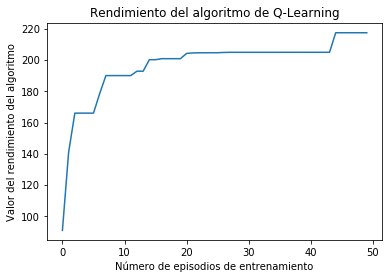

In [126]:
q = inicializa_Q(data)
q, rendimiento = q_learning_F2(data, recompensas, q, 0, 6, 50, 0.5, 0.5, 0.1)
print('\nMatriz Q obtenida =\n',q)
muestra_rendimiento(rendimiento)

# Q-1

[[0, 23.828125, 0, 24.70703125, 0, 0, 0, 0, 0], [12.353515625, 0, 49.4140625, 0, 45.3125, 0, 0, 0, 0], [0, 24.70703125, 0, 24.70703125, 0, 95.3125, 0, 98.828125, 0], [12.353515625, 0, 49.4140625, 0, 0, 0, 0, 0, 49.4140625], [0, 23.828125, 0, 0, 0, 95.3125, 0, 0, 0], [0, 0, 49.4140625, 0, 45.3125, 0, 190.625, 0, 0], [0, 0, 0, 0, 0, 95.3125, 195.3125, 95.3125, 0], [0, 0, 49.4140625, 0, 0, 0, 197.65625, 0, 49.4140625], [0, 0, 0, 24.70703125, 0, 0, 0, 98.828125, 0]]


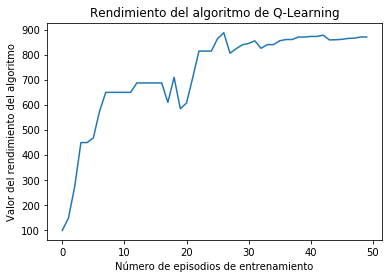

In [85]:
q = inicializa_Q(data)
q, rendimiento = q_learning(data, recompensas, q, 0, 6, 50, 0.5)
print(q)
muestra_rendimiento(rendimiento)

Introduce el valor de la casilla de inicio: 1
Introduce el valor de la casilla objetivo: 1
Introduce el número de episodios de entrenamiento: 1
Introduce el valor del factor de aprendizaje gamma: 1
Introduce el valor del parámetro epsilon: 1
Introduce el valor del parámetro alpha: 1
Epoca = 0 Completado al 0.0%
Epoca = 1 Completado al 100.0%

Matriz Q obtenida =
 [[0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 100.0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0]]


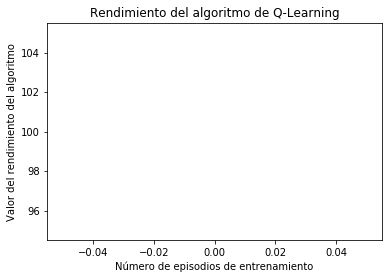

In [51]:
def main(): 
    data, recompensas, q, inicio, fin, epochs, gamma, epsilon, alpha = cargar_datos('./parametros.txt')
    q, rendimiento = q_learning(data, recompensas, q, inicio, fin, epochs, gamma)
    print('\nMatriz Q obtenida =\n',q)
    muestra_rendimiento(rendimiento)
if __name__ == "__main__": main()
   

[[-1, 0, -1, 0, -1, -1, -1, -1, -1], [0, -1, 0, -1, 0, -1, -1, -1, -1], [-1, 0, -1, 0, -1, 0, -1, 0, -1], [0, -1, 0, -1, -1, -1, -1, -1, 0], [-1, 0, -1, -1, -1, 0, -1, -1, -1], [-1, -1, 0, -1, 0, -1, 100, -1, -1], [-1, -1, -1, -1, -1, 0, 100, 0, -1], [-1, -1, 0, -1, -1, -1, 100, -1, 0], [-1, -1, -1, 0, -1, -1, -1, 0, -1]]
Epoca = 0 Completado al 0.0%
Epoca = 1 Completado al 2.0%
Epoca = 2 Completado al 4.0%
Epoca = 3 Completado al 6.0%
Epoca = 4 Completado al 8.0%
Epoca = 5 Completado al 10.0%
Epoca = 6 Completado al 12.0%
Epoca = 7 Completado al 14.000000000000002%
Epoca = 8 Completado al 16.0%
Epoca = 9 Completado al 18.0%
Epoca = 10 Completado al 20.0%
Epoca = 11 Completado al 22.0%
Epoca = 12 Completado al 24.0%
Epoca = 13 Completado al 26.0%
Epoca = 14 Completado al 28.000000000000004%
Epoca = 15 Completado al 30.0%
Epoca = 16 Completado al 32.0%
Epoca = 17 Completado al 34.0%
Epoca = 18 Completado al 36.0%
Epoca = 19 Completado al 38.0%
Epoca = 20 Completado al 40.0%
Epoca = 21 C

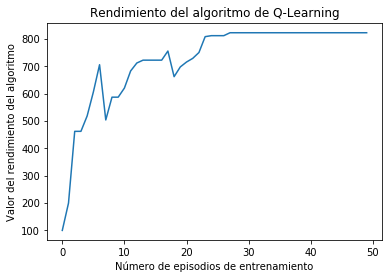

25.0

0: [0, 12.5, 0, 12.5, 0, 0, 0, 0, 0]
1: [6.25, 0, 25.0, 0, 25.0, 0, 0, 0, 0]
2: [0, 12.5, 0, 12.5, 0, 50.0, 0, 50.0, 0]
3: [6.25, 0, 25.0, 0, 0, 0, 0, 0, 25.0]
4: [0, 12.5, 0, 0, 0, 50.0, 0, 0, 0]
5: [0, 0, 25.0, 0, 25.0, 0, 100.0, 0, 0]
6: [0, 0, 0, 0, 0, 0, 0, 0, 0]
7: [0, 0, 25.0, 0, 0, 0, 100.0, 0, 25.0]
8: [0, 0, 0, 12.5, 0, 0, 0, 50.0, 0]


i =  0.1


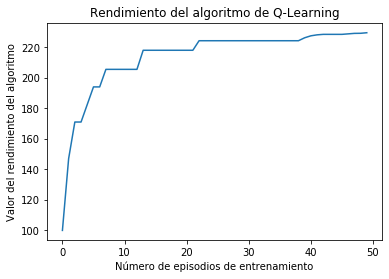

i =  0.1


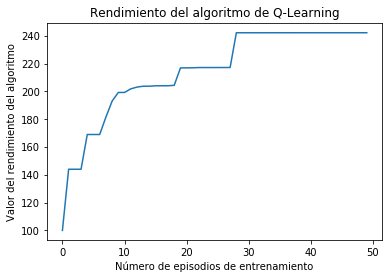

i =  0.1


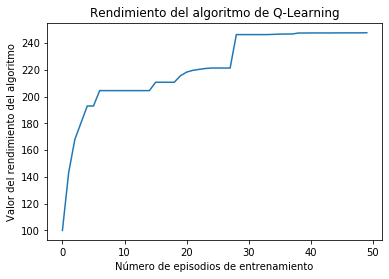

i =  0.1


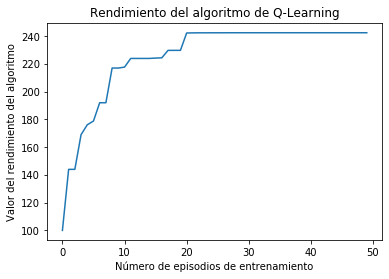

i =  0.2


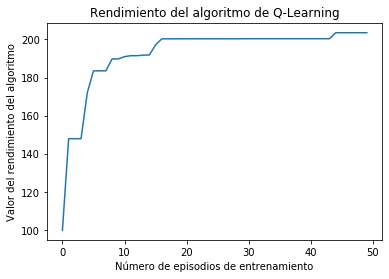

i =  0.2


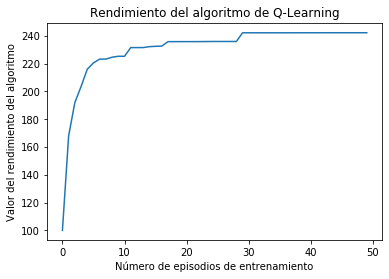

i =  0.2


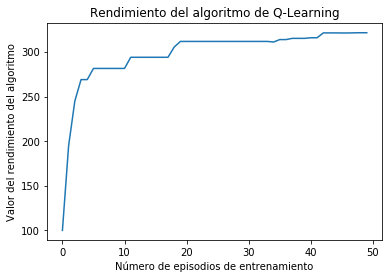

i =  0.2


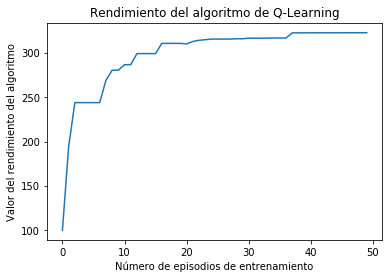

i =  0.30000000000000004


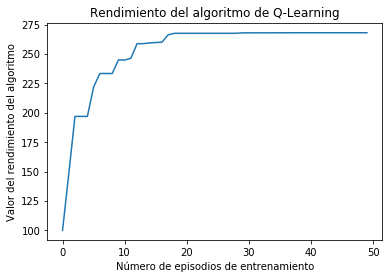

i =  0.30000000000000004


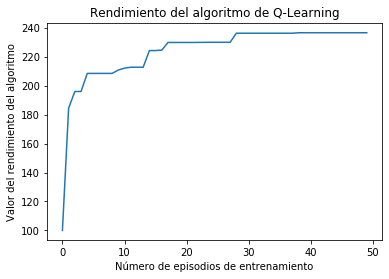

i =  0.30000000000000004


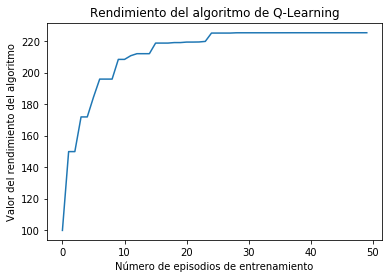

i =  0.30000000000000004


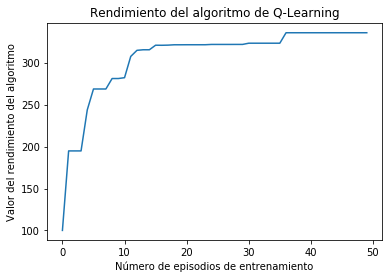

i =  0.4


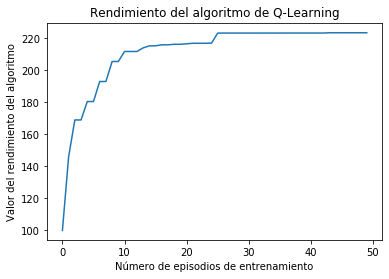

i =  0.4


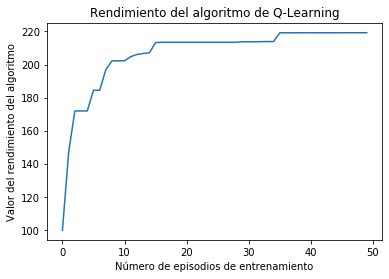

i =  0.4


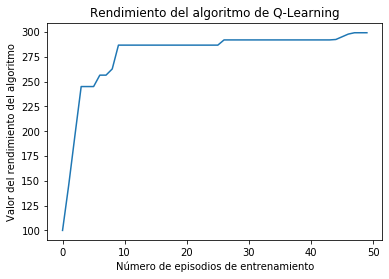

i =  0.4


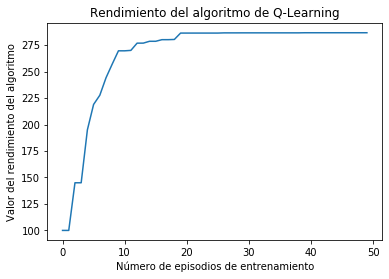

i =  0.5


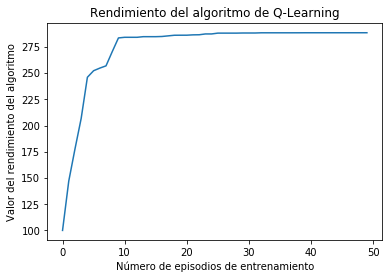

i =  0.5


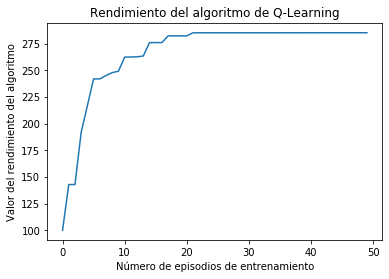

i =  0.5


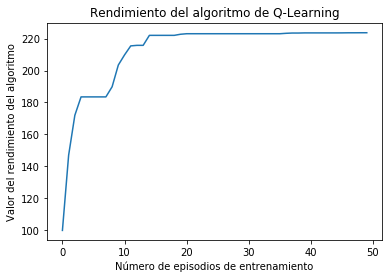

i =  0.5


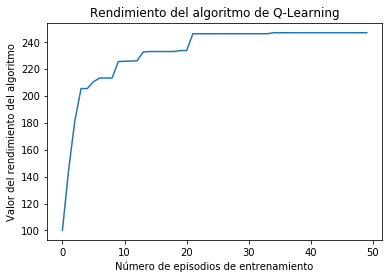

i =  0.6


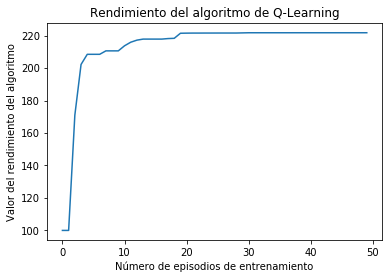

i =  0.6


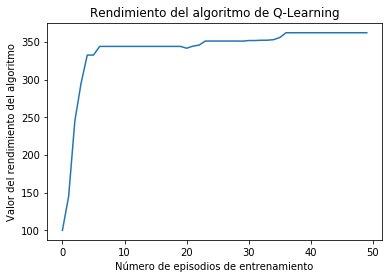

i =  0.6


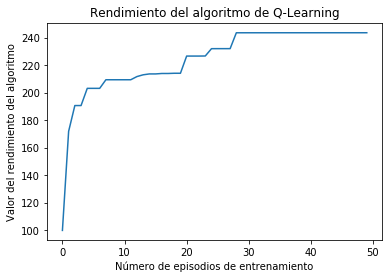

i =  0.6


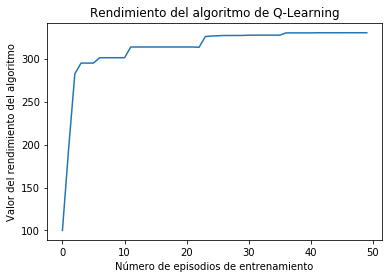

i =  0.7


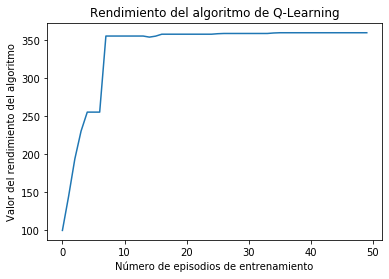

i =  0.7


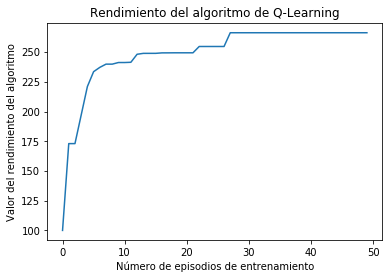

i =  0.7


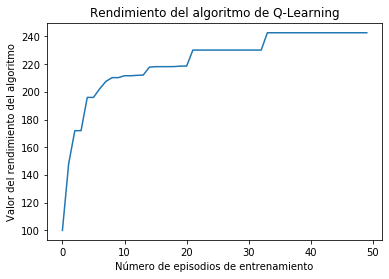

i =  0.7


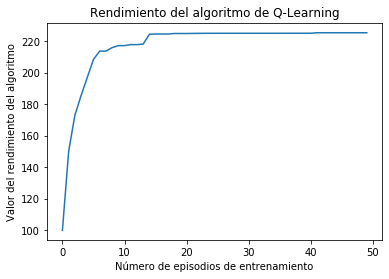

i =  0.7999999999999999


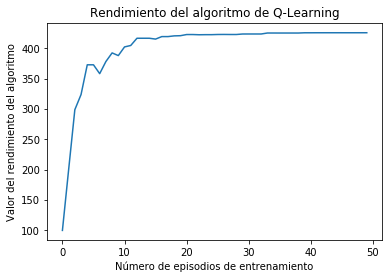

i =  0.7999999999999999


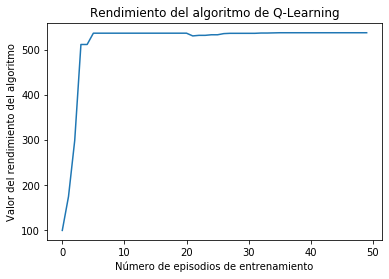

i =  0.7999999999999999


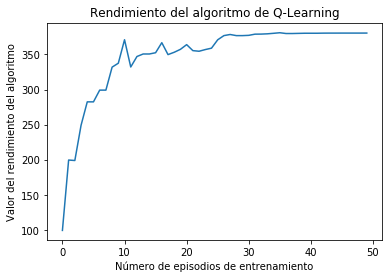

i =  0.7999999999999999


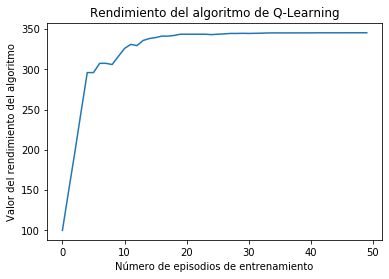

i =  0.8999999999999999


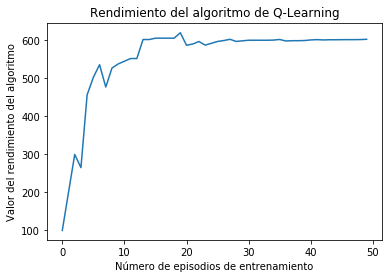

i =  0.8999999999999999


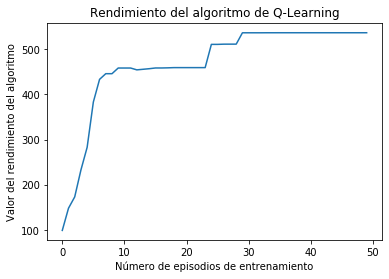

i =  0.8999999999999999


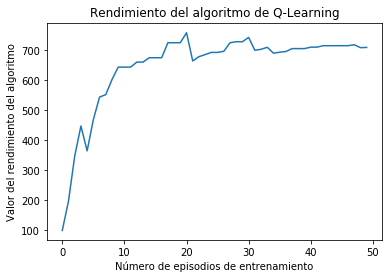

i =  0.8999999999999999


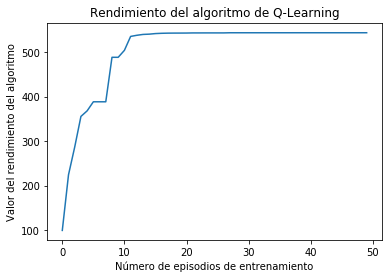

i =  0.9999999999999999


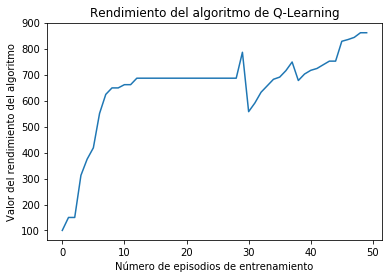

i =  0.9999999999999999


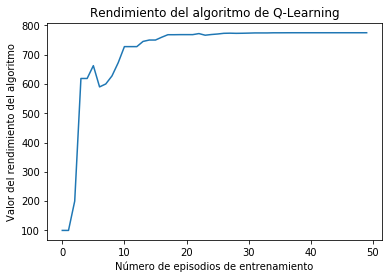

i =  0.9999999999999999


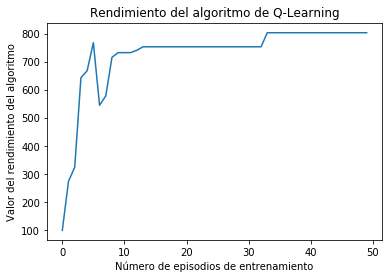

i =  0.9999999999999999


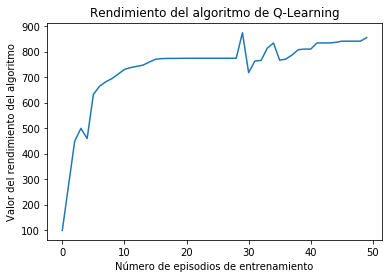

In [129]:
i = 0.1
while i<=1:
    for b in range(0,4):
        q = inicializa_Q(data)
        q, rendimiento = q_learning_F2(data, recompensas, q, 0, 6, 50, 0.5, 1, i)
        print('i = ', i)
        muestra_rendimiento(rendimiento)
    i+=0.1
